Dataset Shape: (569, 30)
Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension'] ...
Predicted Credit Score: 98.85/100


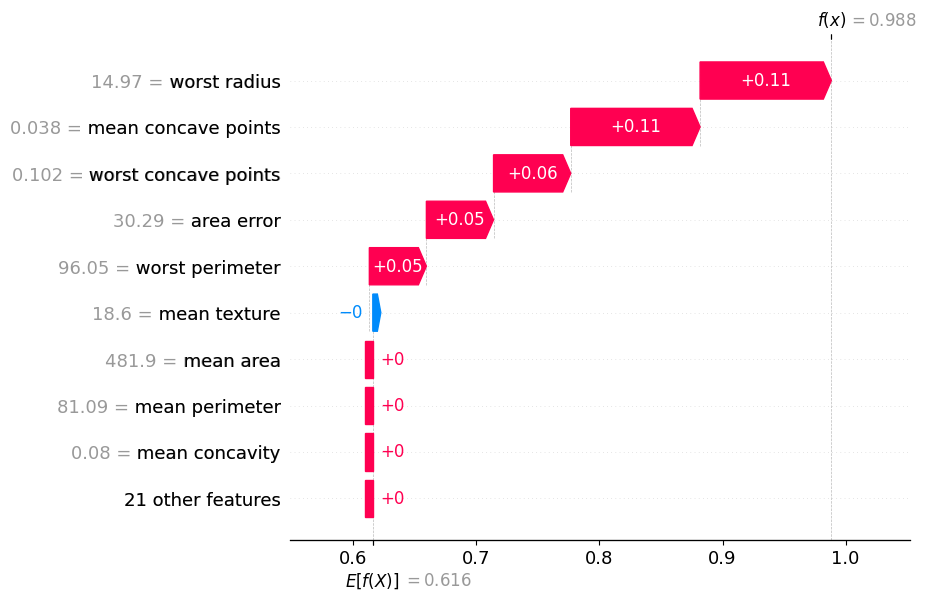

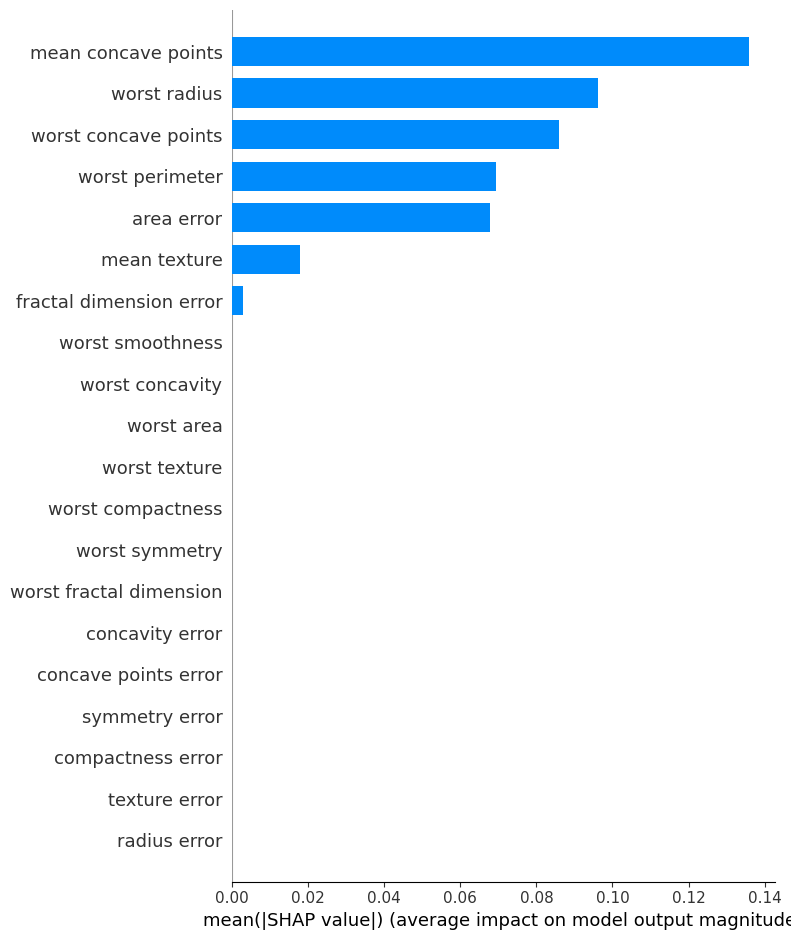

In [11]:
!pip install shap scikit-learn matplotlib pandas --quiet

import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 1. Load dataset
data = load_breast_cancer(as_frame=True)
X, y = data.data, data.target
print("Dataset Shape:", X.shape)
print("Features:", list(X.columns)[:10], "...")

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Decision Tree
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 4. Predict "credit score" for one sample
sample = X_test.iloc[[0]]
proba = model.predict_proba(sample)[0][1]
credit_score = round(proba * 100, 2)
print(f"Predicted Credit Score: {credit_score}/100")

# 5. SHAP with new Explainer API
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)   # returns Explanation with shape (samples, features, classes)

# ✅ Waterfall plot (first sample, positive class = 1)
shap.initjs()
shap.plots.waterfall(shap_values[0, :, 1])

# ✅ Summary plot (all samples, positive class = 1)
shap.summary_plot(shap_values.values[:, :, 1], X_test, plot_type="bar")


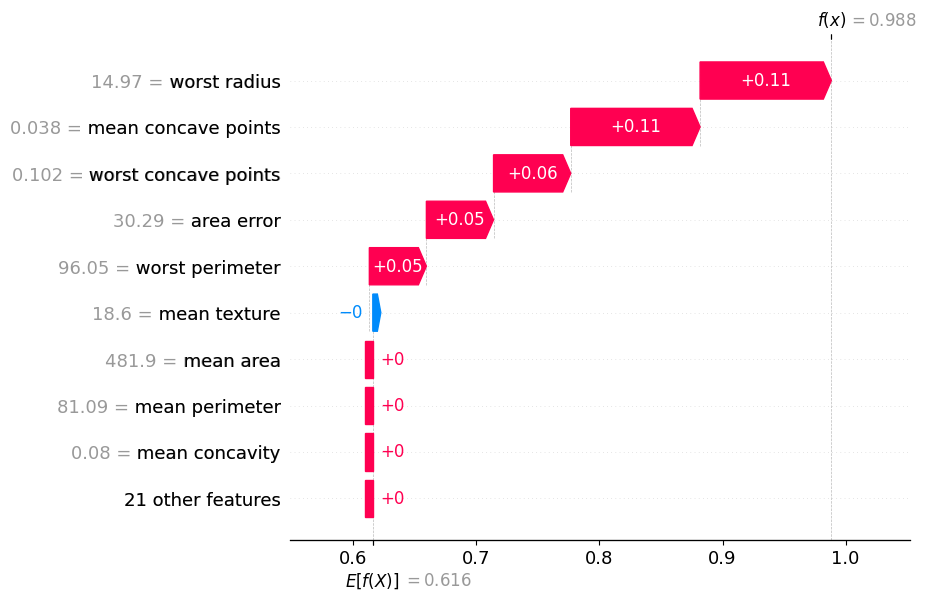

In [12]:
# Save waterfall plot
import matplotlib.pyplot as plt

plt.figure()
shap.plots.waterfall(shap_values[0, :, 1], show=False)
plt.savefig("waterfall_plot.png", dpi=300, bbox_inches="tight")


In [13]:
from google.colab import files
files.download("waterfall_plot.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
plt.figure()
shap.summary_plot(shap_values.values[:, :, 1], X_test, plot_type="bar", show=False)
plt.savefig("summary_plot.png", dpi=300, bbox_inches="tight")


In [15]:
# ✅ Save Waterfall Plot
import matplotlib.pyplot as plt

plt.figure()
shap.plots.waterfall(shap_values[0, :, 1], show=False)
plt.savefig("waterfall_plot.png", dpi=300, bbox_inches="tight")

# ✅ Save Summary Plot
plt.figure()
shap.summary_plot(shap_values.values[:, :, 1], X_test, plot_type="bar", show=False)
plt.savefig("summary_plot.png", dpi=300, bbox_inches="tight")

# ✅ Download files to your computer
from google.colab import files
files.download("waterfall_plot.png")
files.download("summary_plot.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>